In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.optimize import curve_fit

def linear_function(x, a, b):
    return a * x + b

In [2]:
syn_df = pd.read_csv('../../data/synaptome_region_similarity.csv', 
                     sep=',', index_col=0)
syn_df

,ACB,AMB,AN,AOB,AON,APN,AV,BST,CA1,CA2,...,SUV,UVU,V,VAL,VII,VIS,VM,VPL,VPM,ZI
ACB,1.000000,0.060742,0.152906,0.311759,0.393243,0.068055,0.329207,0.098426,0.255592,0.533032,...,0.047882,0.143829,0.046620,0.527457,0.052753,0.543698,0.293971,0.360145,0.658636,0.059287
AMB,0.060742,1.000000,0.397252,0.194836,0.023886,0.892549,0.184510,0.617136,0.015525,0.032377,...,0.788277,0.422320,0.767511,0.115160,0.868477,0.033025,0.206626,0.168660,0.092224,0.976044
AN,0.152906,0.397252,1.000000,0.490460,0.060129,0.445076,0.464466,0.643703,0.039081,0.081504,...,0.313145,0.940642,0.304895,0.289892,0.345004,0.083134,0.520138,0.424567,0.232155,0.387736
AOB,0.311759,0.194836,0.490460,1.000000,0.122597,0.218292,0.947001,0.315711,0.079683,0.166178,...,0.153585,0.461347,0.149539,0.591061,0.169211,0.169503,0.942943,0.865649,0.473341,0.190169
AON,0.393243,0.023886,0.060129,0.122597,1.000000,0.026762,0.129458,0.038705,0.649959,0.737747,...,0.018829,0.056560,0.018333,0.207419,0.020745,0.723274,0.115602,0.141624,0.259004,0.023314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIS,0.543698,0.033025,0.083134,0.169503,0.723274,0.037001,0.178989,0.053514,0.470099,0.980383,...,0.026033,0.078200,0.025347,0.286777,0.028682,1.000000,0.159832,0.195810,0.358099,0.032234
VM,0.293971,0.206626,0.520138,0.942943,0.115602,0.231501,0.892967,0.334814,0.075137,0.156696,...,0.162878,0.489264,0.158588,0.557337,0.179450,0.159832,1.000000,0.816258,0.446333,0.201676
VPL,0.360145,0.168660,0.424567,0.865649,0.141624,0.188965,0.914096,0.273295,0.092050,0.191969,...,0.132951,0.399365,0.129448,0.682795,0.146477,0.195810,0.816258,1.000000,0.546804,0.164620
VPM,0.658636,0.092224,0.232155,0.473341,0.259004,0.103327,0.499832,0.149439,0.168342,0.351074,...,0.072698,0.218375,0.070783,0.800832,0.080094,0.358099,0.446333,0.546804,1.000000,0.090015


In [3]:
ephs_df = pd.read_csv('../../data/ephs_sim_regions.csv', 
                      sep=',', index_col=0)

ephs_df

,SSs,LSr,PH,RE,VISli,CA2,APr,AIp,RSPd,MOs,...,PO,SSp-ul,FRP,SCs,DG,AIv,TEa,VISp,SOC,TT
SSs,1.000000,0.894303,0.091446,0.426447,0.448499,0.479412,0.414939,0.530157,0.797999,0.780402,...,0.356482,0.514094,0.702223,0.762933,0.602087,0.855186,0.839140,0.689214,0.429005,0.626756
LSr,0.894303,1.000000,0.094104,0.470375,0.419270,0.487999,0.427036,0.547621,0.752661,0.720696,...,0.323731,0.512249,0.756447,0.729624,0.560287,0.882719,0.753073,0.632478,0.390262,0.577300
PH,0.091446,0.094104,1.000000,0.079463,0.129127,0.164581,0.216386,0.055268,0.103119,0.104527,...,0.062280,0.167817,0.113732,0.110937,0.105877,0.087716,0.087497,0.102259,0.082040,0.061675
RE,0.426447,0.470375,0.079463,1.000000,0.206839,0.301212,0.313203,0.521454,0.363155,0.345830,...,0.155140,0.296455,0.525264,0.357220,0.268434,0.488739,0.362416,0.300119,0.184531,0.306440
VISli,0.448499,0.419270,0.129127,0.206839,1.000000,0.519082,0.421032,0.240293,0.544448,0.571187,...,0.474198,0.602196,0.388337,0.567802,0.701243,0.389163,0.490983,0.639607,0.623971,0.396517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AIv,0.855186,0.882719,0.087716,0.488739,0.389163,0.437854,0.402901,0.594289,0.692172,0.679358,...,0.309748,0.466989,0.744603,0.665455,0.516122,1.000000,0.739382,0.593866,0.369556,0.580676
TEa,0.839140,0.753073,0.087497,0.362416,0.490983,0.452939,0.390618,0.485157,0.785960,0.826803,...,0.410239,0.501015,0.607508,0.753009,0.652937,0.739382,1.000000,0.762003,0.494255,0.686032
VISp,0.689214,0.632478,0.102259,0.300119,0.639607,0.525237,0.424259,0.374696,0.808415,0.856348,...,0.472180,0.592672,0.541923,0.806630,0.837034,0.593866,0.762003,1.000000,0.593484,0.589929
SOC,0.429005,0.390262,0.082040,0.184531,0.623971,0.380625,0.284513,0.255799,0.494847,0.515816,...,0.708306,0.417466,0.325166,0.496489,0.646761,0.369556,0.494255,0.593484,1.000000,0.487350


In [4]:
cmp_df = pd.DataFrame()
for i in range(0, len(syn_df)):
    for j in range(0, len(syn_df)):
        if i < j:
            continue
        cmp_df = pd.concat([cmp_df,
                            pd.DataFrame({'region1': [syn_df.columns[i]],
                                          'region2': [syn_df.columns[j]],
                                          'ephs_sim': [ephs_df.iloc[i,j]],
                                          'region_sim': [syn_df.iloc[i,j]],
                                         })
                           ], axis=0)

cmp_df

,region1,region2,ephs_sim,region_sim
0,ACB,ACB,1.000000,1.000000
0,AMB,ACB,0.894303,0.060742
0,AMB,AMB,1.000000,1.000000
0,AN,ACB,0.091446,0.152906
0,AN,AMB,0.094104,0.397252
...,...,...,...,...
0,ZI,VIS,0.608028,0.032234
0,ZI,VM,0.558041,0.201676
0,ZI,VPL,0.039251,0.164620
0,ZI,VPM,0.370292,0.090015


In [5]:
cmp_df2 = cmp_df[cmp_df['region1'] != cmp_df['region2']].copy()
cmp_df2

,region1,region2,ephs_sim,region_sim
0,AMB,ACB,0.894303,0.060742
0,AN,ACB,0.091446,0.152906
0,AN,AMB,0.094104,0.397252
0,AOB,ACB,0.426447,0.311759
0,AOB,AMB,0.470375,0.194836
...,...,...,...,...
0,ZI,VII,0.382594,0.889792
0,ZI,VIS,0.608028,0.032234
0,ZI,VM,0.558041,0.201676
0,ZI,VPL,0.039251,0.164620


In [6]:
th = 0.01
if len(cmp_df2[cmp_df2['ephs_sim']<th].copy()) / len(cmp_df2.copy()) > 0.1:
    print(True)
    cmp_df2 = cmp_df2[(cmp_df2['ephs_sim']>th)&(cmp_df2['ephs_sim']<1)].copy()
else:
    print(False)

if len(cmp_df2[cmp_df2['region_sim']<th].copy()) / len(cmp_df2.copy()) > 0.1:
    print(True)
    cmp_df2 = cmp_df2[(cmp_df2['region_sim']>th)&(cmp_df2['region_sim']<1)].copy()
else:
    print(False)

False
False


<Axes: xlabel='ephs_sim', ylabel='Count'>

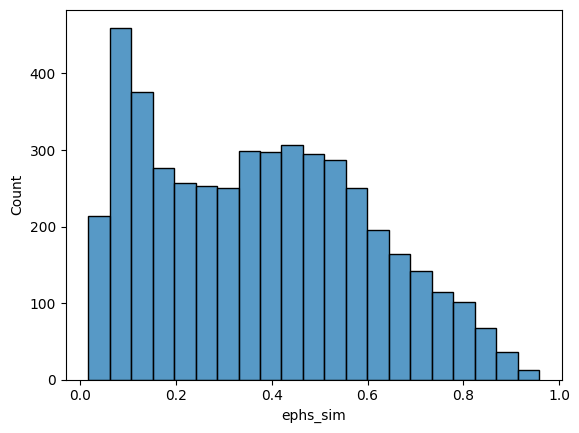

In [7]:
sns.histplot(cmp_df2, x='ephs_sim')

<Axes: xlabel='region_sim', ylabel='Count'>

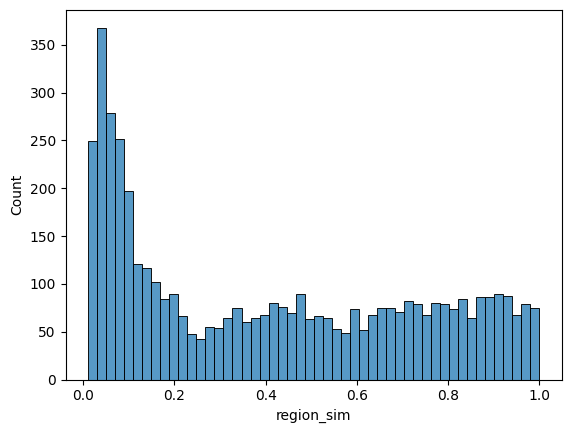

In [8]:
sns.histplot(cmp_df2, bins=50, x='region_sim')

In [9]:
cmp_df3 = cmp_df2.copy() #.sample(500)
# cmp_df3['ephs_sim_norm'] = np.sqrt(cmp_df3['ephs_sim'])
cmp_df3['ephs_sim_norm'] = cmp_df3['ephs_sim']
cmp_df3

,region1,region2,ephs_sim,region_sim,ephs_sim_norm
0,AMB,ACB,0.894303,0.060742,0.894303
0,AN,ACB,0.091446,0.152906,0.091446
0,AN,AMB,0.094104,0.397252,0.094104
0,AOB,ACB,0.426447,0.311759,0.426447
0,AOB,AMB,0.470375,0.194836,0.470375
...,...,...,...,...,...
0,ZI,VII,0.382594,0.889792,0.382594
0,ZI,VIS,0.608028,0.032234,0.608028
0,ZI,VM,0.558041,0.201676,0.558041
0,ZI,VPL,0.039251,0.164620,0.039251


In [10]:
cmp_df3['ephs_sim_cat'] = -1
n_bin = 50
for i in list(range(1,n_bin+1))[::-1]:
    cmp_df3.loc[cmp_df3['ephs_sim_norm']<=i/n_bin, 'ephs_sim_cat'] = i

cmp_df3['region_sim_cat'] = -1
for i in list(range(1,n_bin+1))[::-1]:
    cmp_df3.loc[cmp_df3['region_sim']<=i/n_bin, 'region_sim_cat'] = i

# cmp_df3 = cmp_df3[gene_sim['euc_dis_cat'] != -1].copy()
cmp_df3

,region1,region2,ephs_sim,region_sim,ephs_sim_norm,ephs_sim_cat,region_sim_cat
0,AMB,ACB,0.894303,0.060742,0.894303,45,4
0,AN,ACB,0.091446,0.152906,0.091446,5,8
0,AN,AMB,0.094104,0.397252,0.094104,5,20
0,AOB,ACB,0.426447,0.311759,0.426447,22,16
0,AOB,AMB,0.470375,0.194836,0.470375,24,10
...,...,...,...,...,...,...,...
0,ZI,VII,0.382594,0.889792,0.382594,20,45
0,ZI,VIS,0.608028,0.032234,0.608028,31,2
0,ZI,VM,0.558041,0.201676,0.558041,28,11
0,ZI,VPL,0.039251,0.164620,0.039251,2,9


In [11]:
cross_df = pd.crosstab(cmp_df3['ephs_sim_cat'], cmp_df3['region_sim_cat'])

cross_df2 = pd.DataFrame(np.zeros((n_bin, n_bin)),
                         index=range(1, n_bin+1),
                         columns=range(1, n_bin+1)
                        )
cross_df2.index.name = 'ephs_sim_cat'
cross_df2.columns.name = 'region_sim_cat'

for i in cross_df.index:
    for j in cross_df.columns:
        cross_df2.loc[i, j] = cross_df.loc[i, j]

# cross_df = cross_df.iloc[::-1,]
cross_df2

region_sim_cat,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
ephs_sim_cat,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,2.0,1.0,2.0,3.0,4.0,4.0,7.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,12.0,8.0,3.0,3.0,5.0,2.0,6.0,5.0,4.0,...,4.0,2.0,2.0,2.0,5.0,4.0,1.0,3.0,2.0,2.0
4,0.0,12.0,18.0,10.0,13.0,1.0,5.0,2.0,2.0,3.0,...,3.0,3.0,6.0,2.0,3.0,2.0,5.0,5.0,6.0,3.0
5,3.0,18.0,12.0,10.0,11.0,4.0,5.0,5.0,4.0,8.0,...,2.0,3.0,7.0,5.0,4.0,5.0,4.0,6.0,4.0,2.0
6,6.0,13.0,19.0,16.0,11.0,7.0,6.0,4.0,4.0,3.0,...,4.0,3.0,3.0,7.0,7.0,4.0,3.0,2.0,2.0,3.0
7,4.0,10.0,10.0,17.0,7.0,7.0,3.0,4.0,3.0,5.0,...,1.0,1.0,5.0,2.0,3.0,0.0,6.0,3.0,4.0,2.0
8,2.0,8.0,12.0,11.0,10.0,5.0,2.0,5.0,2.0,2.0,...,1.0,4.0,3.0,5.0,3.0,1.0,5.0,1.0,2.0,2.0
9,0.0,7.0,7.0,9.0,9.0,2.0,4.0,2.0,1.0,3.0,...,2.0,0.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,4.0


In [12]:
import numpy as np
import pandas as pd

masked = np.ma.masked_equal(cross_df2.values, 0)

median = np.ma.median(masked)
mad = np.ma.median(np.abs(masked - median))
robust_z = 0.6745 * (masked - median) / mad

thresh = 3.5
mask_np = np.abs(robust_z.filled(np.nan)) > thresh
mask_df = pd.DataFrame(mask_np,
                      index=cross_df2.index,
                      columns=cross_df2.columns)

idx_pairs = mask_df.stack()[mask_df.stack()].index.tolist()

print(len(idx_pairs))

from scipy.ndimage import uniform_filter

mean_8nb = uniform_filter(cross_df2, size=3, mode='mirror') * 9/8 - cross_df2/8

cross_df2[mask_df] = mean_8nb[mask_df]

76


In [13]:
x = cmp_df3['region_sim_cat']
y = n_bin-cmp_df3['ephs_sim_cat']

params, covariance = curve_fit(linear_function, x, y)
a, b = params
x_fit = np.linspace(min(x-1), max(x+1), 100)
y_fit = linear_function(x_fit, a, b)

In [14]:
from sklearn.linear_model import TheilSenRegressor
xx = cmp_df3['region_sim_cat']
yy = n_bin - cmp_df3['ephs_sim_cat']

X = xx.values.reshape(-1,1)
model = TheilSenRegressor(random_state=42).fit(X, yy)
a_ts = model.coef_[0]
b_ts = model.intercept_
xx_fit_z = np.linspace(min(xx-1), max(xx+1), 100)
yy_fit_z = linear_function(xx_fit_z, a_ts, b_ts)
a_ts

0.08501440247948239

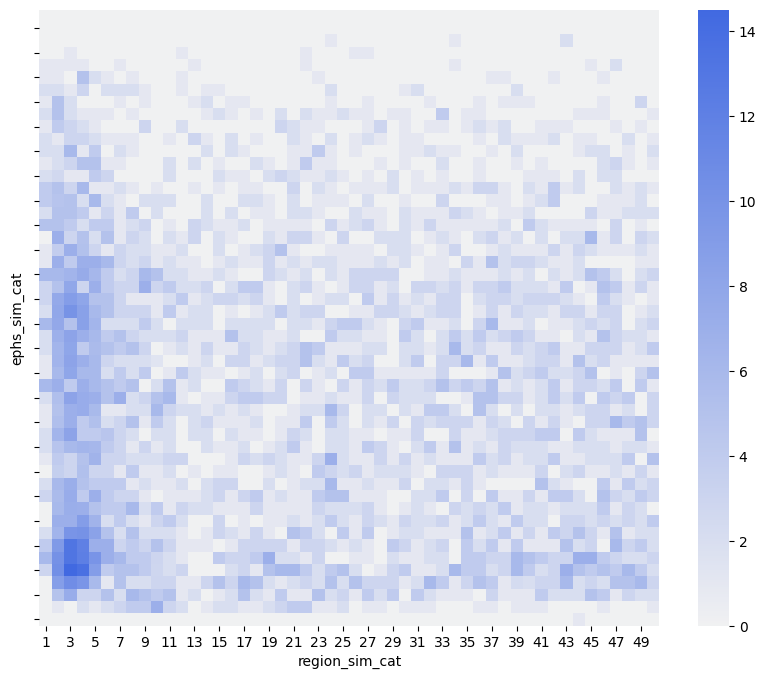

In [15]:
f, ax = plt.subplots(1,1,figsize=(10,8))
sns.heatmap(cross_df2.iloc[::-1, ], 
            cmap=sns.color_palette("light:royalblue", as_cmap=True),
            # mask=cross_df<=0
           )

tick_pos = np.arange(0, n_bin, 2)
plt.xticks(tick_pos+0.5, rotation=0)
plt.yticks(tick_pos+1.5, rotation=0)

# plt.plot(x_fit, y_fit, color='red', 
#          linewidth=2, linestyle='--',
#          label='Fitted Curve')
# plt.plot(xx_fit_z, yy_fit_z, color='green', 
#          linewidth=2, linestyle='--',
#          label='Fitted Curve')
#plt.savefig('./cmp_synaptome_region_sim.png', dpi=400, bbox_inches='tight')
plt.savefig('./ephy_synpatome.svg', bbox_inches='tight')
plt.show()

In [16]:
# cmp_df4 = cmp_df3.copy() #[(cmp_df3['region_sim']>=0.16)&(cmp_df3['region_sim']<=1)].copy()
# cmp_df4 = cmp_df3[(cmp_df3['region_sim']>=0.2)&(cmp_df3['region_sim']<=1-0.2)].copy()
cmp_df4 = cmp_df3.copy()
stats.pearsonr(cmp_df4['ephs_sim_norm'], 
               cmp_df4['region_sim'])

PearsonRResult(statistic=-0.034109705499872786, pvalue=0.01993737941749956)

In [17]:
stats.spearmanr(cmp_df4['ephs_sim_cat'], 
               cmp_df4['region_sim_cat'])

SignificanceResult(statistic=-0.040478523999800814, pvalue=0.005737144256064724)

In [18]:
stats.spearmanr(cmp_df4['ephs_sim'], 
               cmp_df4['region_sim'])

SignificanceResult(statistic=-0.04106024838105089, pvalue=0.005075998138197606)